In [1]:
import input as i
import alg as a
import alg_google as a_g
import numpy as np

import matplotlib.pyplot as plt

In [2]:
B = 20
w_list = np.linspace(0, 0.9, 10)
repeat = 5000
std = 90

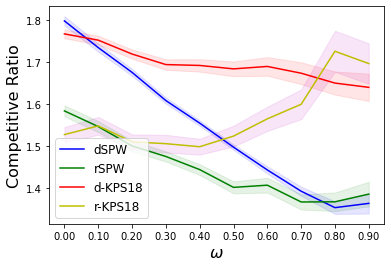

In [21]:
# competitive ratio against omega
alg_ratio = np.zeros((len(w_list), repeat))
rand_ratio = np.zeros((len(w_list), repeat))
google_ratio = np.zeros((len(w_list), repeat))
google_r_ratio = np.zeros((len(w_list), repeat))

for idx, w in enumerate(w_list):
    for j in np.arange(repeat):
        ins = i.Instance(B=B, time_dependant=True, predictor_std=std)
        alg = a.DPOA(ins, w=w)
        rand = a.RPOA(ins, w=w)
        google = a_g.DPOA_google(ins, w)
        g_rand = a_g.RPOA_google(ins, w)
        opt = a.OPT(ins)

        alg_ratio[idx, j] = alg / opt
        rand_ratio[idx, j] = rand / opt
        google_ratio[idx, j] = google / opt
        google_r_ratio[idx, j] = g_rand / opt
avg_ratio = np.mean(alg_ratio, axis=1)
ci = 1.96 * np.std(alg_ratio,axis=1)/np.sqrt(repeat)
avg_r_ratio = np.mean(rand_ratio, axis=1)
ci_r = 1.96 * np.std(rand_ratio,axis=1)/np.sqrt(repeat)
avg_ratio_g = np.mean(google_ratio, axis=1)
ci_g = 1.96 * np.std(google_ratio,axis=1)/np.sqrt(repeat)
avg_ratio_gr = np.mean(google_r_ratio, axis=1)
ci_gr = 1.96 * np.std(google_r_ratio,axis=1)/np.sqrt(repeat)

plt.clf()

positions = np.arange(1, len(w_list)+1)

plt.plot(positions, avg_ratio, label="dSPW", color='b')
plt.fill_between(positions, (avg_ratio-ci), (avg_ratio+ci), color='b', alpha=.1)

plt.plot(positions, avg_r_ratio, label="rSPW", color='g')
plt.fill_between(positions, (avg_r_ratio-ci_r), (avg_r_ratio+ci_r), color='g', alpha=.1)


plt.plot(positions, avg_ratio_g, label="d-KPS18", color='r')
plt.fill_between(positions, (avg_ratio_g-ci_g), (avg_ratio_g+ci_g), color='r', alpha=.1)

plt.plot(positions, avg_ratio_gr, label="r-KPS18", color='y')
plt.fill_between(positions, (avg_ratio_gr-ci_gr), (avg_ratio_gr+ci_gr), color='m', alpha=.1)


formated_list = ['%.2f' % elem for elem in w_list ]
plt.xticks(positions, formated_list);

plt.legend(loc='lower left', prop={'size': 12})
plt.xlabel("$\omega$", fontsize=16)
plt.ylabel("Competitive Ratio", fontsize=16)

plt.savefig("competitive ratio against omega", dpi=1000)

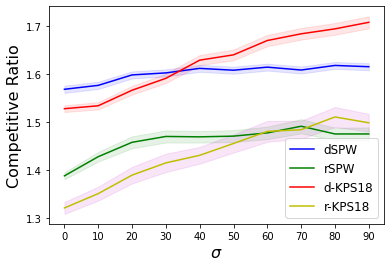

In [19]:
# competitive ratio against sigma
std_list = np.arange(0,100,10)
w = 0.3

alg_ratio = np.zeros((len(w_list), repeat))
rand_ratio = np.zeros((len(w_list), repeat))
google_ratio = np.zeros((len(w_list), repeat))
google_r_ratio = np.zeros((len(w_list), repeat))

for idx, std in enumerate(std_list):
    for j in np.arange(repeat):
        ins = i.Instance(B=B, time_dependant=True, predictor_std=std)
        alg = a.DPOA(ins, w=w)
        rand = a.RPOA(ins, w=w)
        google = a_g.DPOA_google(ins, w)
        g_rand = a_g.RPOA_google(ins, w)
        opt = a.OPT(ins)

        alg_ratio[idx, j] = alg / opt
        rand_ratio[idx, j] = rand / opt
        google_ratio[idx, j] = google / opt
        google_r_ratio[idx, j] = g_rand / opt

avg_ratio = np.mean(alg_ratio, axis=1)
ci = 1.96 * np.std(alg_ratio,axis=1)/np.sqrt(repeat)
avg_r_ratio = np.mean(rand_ratio, axis=1)
ci_r = 1.96 * np.std(rand_ratio,axis=1)/np.sqrt(repeat)
avg_ratio_g = np.mean(google_ratio, axis=1)
ci_g = 1.96 * np.std(google_ratio,axis=1)/np.sqrt(repeat)
avg_ratio_gr = np.mean(google_r_ratio, axis=1)
ci_gr = 1.96 * np.std(google_r_ratio,axis=1)/np.sqrt(repeat)

plt.clf()

positions = np.arange(1, len(std_list)+1)

plt.plot(positions, avg_ratio, label="dSPW", color='b')
plt.fill_between(positions, (avg_ratio-ci), (avg_ratio+ci), color='b', alpha=.1)

plt.plot(positions, avg_r_ratio, label="rSPW", color='g')
plt.fill_between(positions, (avg_r_ratio-ci_r), (avg_r_ratio+ci_r), color='g', alpha=.1)


plt.plot(positions, avg_ratio_g, label="d-KPS18", color='r')
plt.fill_between(positions, (avg_ratio_g-ci_g), (avg_ratio_g+ci_g), color='r', alpha=.1)

plt.plot(positions, avg_ratio_gr, label="r-KPS18", color='y')
plt.fill_between(positions, (avg_ratio_gr-ci_gr), (avg_ratio_gr+ci_gr), color='m', alpha=.1)


formated_list = ['%d' % elem for elem in std_list ]
plt.xticks(positions, formated_list);

plt.legend(loc='lower right', prop={'size': 12})
plt.xlabel("$\sigma$", fontsize=16)
plt.ylabel("Competitive Ratio", fontsize=16)

plt.savefig("competitive ratio against sigma", dpi=1000)